# Benchmarks for `mlx-community/Meta-Llama-3-8B-Instruct-4bit`

Run on Mac M3 Max 128Gb

In [4]:
import sys
sys.path.insert(0, '..') # needed as the module is in parent dir

from mlx_parallm.utils import load, generate, batch_generate
import string
import random

# load model
#model, tokenizer = load("meta-llama/Meta-Llama-3-8B-Instruct")
#model, tokenizer = load("microsoft/Phi-3-mini-4k-instruct")
#model, tokenizer = load("google/gemma-1.1-2b-it")
model, tokenizer = load("mlx-community/Meta-Llama-3-8B-Instruct-4bit")
#model, tokenizer = load("mlx-community/Phi-3-mini-4k-instruct-4bit")
#model, tokenizer = load("mlx-community/gemma-1.1-2b-it-4bit")
#model, tokenizer = load("mlx-community/gemma-2-27b-it-fp16")

capital_letters = string.ascii_uppercase
distinct_pairs = [(a, b) for i, a in enumerate(capital_letters) for b in capital_letters[i + 1:]]

num_prompts = 325
prompt_template = "Think of a real word containing both the letters {l1} and {l2}. Then, say 3 sentences which use the word."
prompts_raw = [prompt_template.format(l1=p[0], l2=p[1]) for p in random.sample(distinct_pairs, num_prompts)]
prompt_template_2 = "Come up with a real English word containing both the letters {l1} and {l2}. No acronyms. Then, give 3 complete sentences which use the word."
prompts_raw_2 = [prompt_template_2.format(l1=p[0], l2=p[1]) for p in random.sample(distinct_pairs, num_prompts)]

# for more possible prompts use triplets 
# Generate distinct triplets of capital letters
# capital_letters = string.ascii_uppercase
# distinct_triplets = list(combinations(capital_letters, 3))
# Ensure the sample size is within the limit
# num_prompts = 2600  # Choose a value within the limit of 2600
# prompt_template = "Think of a real word containing the letters {l1}, {l2}, and {l3}. Then, say 3 sentences which use the word."
# prompts_raw = [prompt_template.format(l1=p[0], l2=p[1], l3=p[2]) for p in random.sample(distinct_triplets, num_prompts)]
# prompt_template_2 = "Come up with a real English word containing the letters {l1}, {l2}, and {l3}. No acronyms. Then, give 3 complete sentences which use the word."
# prompts_raw_2 = [prompt_template_2.format(l1=p[0], l2=p[1], l3=p[2]) for p in random.sample(distinct_triplets, num_prompts)]

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# Benchmarks 

In [ ]:
!pip install pandas tqdm

In [9]:
# takes 32m 12s

from tqdm import tqdm
import time
import pandas as pd 
# Initialize an empty list to store the results
results = []

# Run the benchmark for prompt counts increasing by steps of 5
for num_prompts in tqdm(range(1, 301, 5)):
    # Select the appropriate number of prompts
    prompts = prompts_raw[:num_prompts]
    
    # Measure the time taken for batch_generate
    start_time = time.time()
    responses = batch_generate(model, tokenizer, prompts, max_tokens=100, verbose=True, format_prompts=True, temp=0.0)
    end_time = time.time()
    
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    
    # Store the results
    results.append({
        'num_prompts': num_prompts,
        'time_taken': elapsed_time
    })

# Create a pandas DataFrame from the results
df = pd.DataFrame(results)

df


  0%|          | 0/60 [00:00<?, ?it/s]

  2%|▏         | 1/60 [00:02<02:11,  2.22s/it]

Prompt: 200.931 tokens-per-sec
Generation: 48.716 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.


  3%|▎         | 2/60 [00:10<05:33,  5.75s/it]

Prompt: 390.171 tokens-per-sec
Generation: 77.999 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then, 

  5%|▌         | 3/60 [00:19<06:41,  7.05s/it]

Prompt: 473.476 tokens-per-sec
Generation: 140.917 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

  7%|▋         | 4/60 [00:26<06:54,  7.40s/it]

Prompt: 503.708 tokens-per-sec
Generation: 233.066 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

  8%|▊         | 5/60 [00:34<06:47,  7.42s/it]

Prompt: 698.794 tokens-per-sec
Generation: 327.150 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 10%|█         | 6/60 [00:42<06:46,  7.53s/it]

Prompt: 718.436 tokens-per-sec
Generation: 399.447 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 12%|█▏        | 7/60 [00:50<06:47,  7.69s/it]

Prompt: 734.534 tokens-per-sec
Generation: 471.536 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 13%|█▎        | 8/60 [01:01<07:44,  8.94s/it]

Prompt: 711.777 tokens-per-sec
Generation: 363.753 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 15%|█▌        | 9/60 [01:14<08:36, 10.12s/it]

Prompt: 641.115 tokens-per-sec
Generation: 388.855 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 17%|█▋        | 10/60 [01:27<09:12, 11.04s/it]

Prompt: 623.673 tokens-per-sec
Generation: 433.839 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 18%|█▊        | 11/60 [01:40<09:33, 11.71s/it]

Prompt: 640.377 tokens-per-sec
Generation: 485.936 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 20%|██        | 12/60 [01:54<09:45, 12.19s/it]

Prompt: 659.331 tokens-per-sec
Generation: 538.215 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 22%|██▏       | 13/60 [02:07<09:50, 12.56s/it]

Prompt: 676.545 tokens-per-sec
Generation: 589.467 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 23%|██▎       | 14/60 [02:24<10:44, 14.00s/it]

Prompt: 680.186 tokens-per-sec
Generation: 470.268 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 25%|██▌       | 15/60 [02:43<11:30, 15.35s/it]

Prompt: 686.704 tokens-per-sec
Generation: 475.172 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 27%|██▋       | 16/60 [03:03<12:14, 16.69s/it]

Prompt: 649.040 tokens-per-sec
Generation: 480.363 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 28%|██▊       | 17/60 [03:23<12:46, 17.84s/it]

Prompt: 626.652 tokens-per-sec
Generation: 503.052 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 30%|███       | 18/60 [03:44<13:02, 18.64s/it]

Prompt: 634.112 tokens-per-sec
Generation: 540.609 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 32%|███▏      | 19/60 [04:04<13:07, 19.21s/it]

Prompt: 649.852 tokens-per-sec
Generation: 576.961 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 33%|███▎      | 20/60 [04:25<13:02, 19.56s/it]

Prompt: 658.642 tokens-per-sec
Generation: 622.662 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 35%|███▌      | 21/60 [04:49<13:43, 21.11s/it]

Prompt: 655.036 tokens-per-sec
Generation: 518.665 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 37%|███▋      | 22/60 [05:14<14:06, 22.28s/it]

Prompt: 658.491 tokens-per-sec
Generation: 542.702 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 38%|███▊      | 23/60 [05:40<14:18, 23.20s/it]

Prompt: 658.078 tokens-per-sec
Generation: 565.909 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 40%|████      | 24/60 [06:06<14:25, 24.03s/it]

Prompt: 646.091 tokens-per-sec
Generation: 584.446 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 42%|████▏     | 25/60 [06:35<14:51, 25.49s/it]

Prompt: 589.966 tokens-per-sec
Generation: 552.377 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 43%|████▎     | 26/60 [07:02<14:49, 26.15s/it]

Prompt: 629.999 tokens-per-sec
Generation: 603.091 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 45%|████▌     | 27/60 [07:34<15:22, 27.95s/it]

Prompt: 601.416 tokens-per-sec
Generation: 529.830 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 47%|████▋     | 28/60 [08:05<15:23, 28.87s/it]

Prompt: 648.197 tokens-per-sec
Generation: 569.262 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 48%|████▊     | 29/60 [08:36<15:13, 29.48s/it]

Prompt: 663.715 tokens-per-sec
Generation: 595.851 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 50%|█████     | 30/60 [09:08<15:00, 30.01s/it]

Prompt: 664.529 tokens-per-sec
Generation: 613.744 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 52%|█████▏    | 31/60 [09:39<14:44, 30.51s/it]

Prompt: 664.450 tokens-per-sec
Generation: 630.966 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 53%|█████▎    | 32/60 [10:11<14:26, 30.94s/it]

Prompt: 667.918 tokens-per-sec
Generation: 650.046 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 55%|█████▌    | 33/60 [10:48<14:40, 32.60s/it]

Prompt: 656.775 tokens-per-sec
Generation: 571.970 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 57%|█████▋    | 34/60 [11:24<14:38, 33.79s/it]

Prompt: 665.775 tokens-per-sec
Generation: 591.335 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 58%|█████▊    | 35/60 [12:01<14:27, 34.71s/it]

Prompt: 665.572 tokens-per-sec
Generation: 608.229 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 60%|██████    | 36/60 [12:38<14:09, 35.40s/it]

Prompt: 674.456 tokens-per-sec
Generation: 625.740 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 62%|██████▏   | 37/60 [13:16<13:48, 36.02s/it]

Prompt: 668.080 tokens-per-sec
Generation: 640.569 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 63%|██████▎   | 38/60 [13:53<13:24, 36.55s/it]

Prompt: 676.055 tokens-per-sec
Generation: 654.519 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 65%|██████▌   | 39/60 [14:32<12:58, 37.06s/it]

Prompt: 668.960 tokens-per-sec
Generation: 669.122 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 67%|██████▋   | 40/60 [15:14<12:53, 38.66s/it]

Prompt: 668.375 tokens-per-sec
Generation: 604.512 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 68%|██████▊   | 41/60 [15:57<12:38, 39.91s/it]

Prompt: 668.042 tokens-per-sec
Generation: 616.862 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 70%|███████   | 42/60 [16:40<12:15, 40.85s/it]

Prompt: 669.025 tokens-per-sec
Generation: 632.363 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 72%|███████▏  | 43/60 [17:23<11:47, 41.63s/it]

Prompt: 667.377 tokens-per-sec
Generation: 645.560 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 73%|███████▎  | 44/60 [18:07<11:15, 42.25s/it]

Prompt: 674.235 tokens-per-sec
Generation: 658.781 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 75%|███████▌  | 45/60 [18:51<10:41, 42.80s/it]

Prompt: 675.844 tokens-per-sec
Generation: 670.653 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 77%|███████▋  | 46/60 [19:39<10:22, 44.46s/it]

Prompt: 668.554 tokens-per-sec
Generation: 613.753 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 78%|███████▊  | 47/60 [20:28<09:54, 45.72s/it]

Prompt: 670.215 tokens-per-sec
Generation: 624.994 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 80%|████████  | 48/60 [21:17<09:20, 46.74s/it]

Prompt: 666.073 tokens-per-sec
Generation: 636.809 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 82%|████████▏ | 49/60 [22:07<08:43, 47.59s/it]

Prompt: 666.728 tokens-per-sec
Generation: 646.417 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 83%|████████▎ | 50/60 [22:57<08:02, 48.28s/it]

Prompt: 671.890 tokens-per-sec
Generation: 657.236 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 85%|████████▌ | 51/60 [23:47<07:19, 48.87s/it]

Prompt: 675.464 tokens-per-sec
Generation: 667.741 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 87%|████████▋ | 52/60 [24:37<06:34, 49.26s/it]

Prompt: 671.352 tokens-per-sec
Generation: 687.996 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 88%|████████▊ | 53/60 [25:32<05:56, 50.93s/it]

Prompt: 666.131 tokens-per-sec
Generation: 629.089 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 90%|█████████ | 54/60 [26:27<05:13, 52.22s/it]

Prompt: 660.040 tokens-per-sec
Generation: 640.446 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 92%|█████████▏| 55/60 [27:22<04:25, 53.15s/it]

Prompt: 673.775 tokens-per-sec
Generation: 650.783 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 93%|█████████▎| 56/60 [28:18<03:35, 53.93s/it]

Prompt: 675.300 tokens-per-sec
Generation: 659.823 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 95%|█████████▌| 57/60 [29:14<02:43, 54.62s/it]

Prompt: 669.776 tokens-per-sec
Generation: 669.480 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 97%|█████████▋| 58/60 [30:11<01:50, 55.23s/it]

Prompt: 667.896 tokens-per-sec
Generation: 679.527 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

 98%|█████████▊| 59/60 [31:12<00:56, 56.82s/it]

Prompt: 666.427 tokens-per-sec
Generation: 637.277 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

100%|██████████| 60/60 [32:12<00:00, 32.21s/it]

Prompt: 675.033 tokens-per-sec
Generation: 647.938 tokens-per-sec
Prompt: Think of a real word containing both the letters C and N. Then, say 3 sentences which use the word.
The word I'm thinking of is "concentrate".

Here are three sentences that use the word:

1. The scientist asked the team to concentrate on the experiment to get accurate results.
2. After a long day, I like to concentrate on a good book to unwind.
3. The company will concentrate its resources on developing new products to stay competitive in the market.
Prompt: Think of a real word containing both the letters D and Q. Then, say 3 sentences which use the word.
The word I'm thinking of is "quad". Here are three sentences that use the word:

1. The quad bike was a fun way to explore the countryside.
2. The art museum featured a special exhibit on modern quad art.
3. The quad at the university was a popular spot for students to study and socialize.
Prompt: Think of a real word containing both the letters F and O. Then,

num_prompts  time_taken
0             1    2.222526
1             6    8.216541
2            11    8.598156
3            16    7.946799
4            21    7.442052
5            26    7.741008
6            31    8.010922
7            36   11.618387
8            41   12.720475
9            46   13.113277
10           51   13.205177
11           56   13.294826
12           61   13.416539
13           66   17.336535
14           71   18.460103
15           76   19.805387
16           81   20.499769
17           86   20.522479
18           91   20.536569
19           96   20.376629
20          101   24.719366
21          106   25.008857
22          111   25.352958
23          116   25.956684
24          121   28.882851
25          126   27.697112
26          131   32.135766
27          136   31.029170
28          141   30.891067
29          146   31.263486
30          151   31.662947
31          156   31.945223
32          161   36.488847
33          166   36.555078
34          171   36.855931
35          176   37.005382
36          181   37.474468
37          186   37.778605
38          191   38.258933
39          196   42.400298
40          201   42.821406
41          206   43.052591
42          211   43.442153
43          216   43.687553
44          221   44.078808
45          226   48.323867
46          231   48.687071
47          236   49.114516
48          241   49.581221
49          246   49.886422
50          251   50.232166
51          256   50.182988
52          261   54.818675
53          266   55.243936
54          271   55.326630
55          276   55.734012
56          281   56.246696
57          286   56.656810
58          291   60.519226
59          296   60.602700

## Slightly hacky: extract numbers from logs

### Save the cell output from above as benchmark.txt 

In [5]:
# also parse tokens per sec 

import re
import pandas as pd

def parse_floats_from_file(filename):
    # Regular expression pattern to find the float values
    pattern = re.compile(r"Generation:\s+(\d+\.\d+)\s+tokens-per-sec")

    # List to store the parsed float values
    float_values = []

    # Read the file and parse the values
    with open(filename, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                float_values.append(float(match.group(1)))

    # Create a DataFrame from the parsed values
    df = pd.DataFrame(float_values, columns=['tokens_per_sec'])
    
    return df

# Example usage
filename = 'benchmark.txt'
tf = parse_floats_from_file(filename)
tf


tokens_per_sec
0           48.716
1           77.999
2          140.917
3          233.066
4          327.150
5          399.447
6          471.536
7          363.753
8          388.855
9          433.839
10         485.936
11         538.215
12         589.467
13         470.268
14         475.172
15         480.363
16         503.052
17         540.609
18         576.961
19         622.662
20         518.665
21         542.702
22         565.909
23         584.446
24         552.377
25         603.091
26         529.830
27         569.262
28         595.851
29         613.744
30         630.966
31         650.046
32         571.970
33         591.335
34         608.229
35         625.740
36         640.569
37         654.519
38         669.122
39         604.512
40         616.862
41         632.363
42         645.560
43         658.781
44         670.653
45         613.753
46         624.994
47         636.809
48         646.417
49         657.236
50         667.741
51         687.996
52         629.089
53         640.446
54         650.783
55         659.823
56         669.480
57         679.527
58         637.277
59         647.938

In [13]:
df["tokens_per_sec"] = tf["tokens_per_sec"]

In [14]:
df

num_prompts  time_taken  tokens_per_sec
0             1    2.222526          48.716
1             6    8.216541          77.999
2            11    8.598156         140.917
3            16    7.946799         233.066
4            21    7.442052         327.150
5            26    7.741008         399.447
6            31    8.010922         471.536
7            36   11.618387         363.753
8            41   12.720475         388.855
9            46   13.113277         433.839
10           51   13.205177         485.936
11           56   13.294826         538.215
12           61   13.416539         589.467
13           66   17.336535         470.268
14           71   18.460103         475.172
15           76   19.805387         480.363
16           81   20.499769         503.052
17           86   20.522479         540.609
18           91   20.536569         576.961
19           96   20.376629         622.662
20          101   24.719366         518.665
21          106   25.008857         542.702
22          111   25.352958         565.909
23          116   25.956684         584.446
24          121   28.882851         552.377
25          126   27.697112         603.091
26          131   32.135766         529.830
27          136   31.029170         569.262
28          141   30.891067         595.851
29          146   31.263486         613.744
30          151   31.662947         630.966
31          156   31.945223         650.046
32          161   36.488847         571.970
33          166   36.555078         591.335
34          171   36.855931         608.229
35          176   37.005382         625.740
36          181   37.474468         640.569
37          186   37.778605         654.519
38          191   38.258933         669.122
39          196   42.400298         604.512
40          201   42.821406         616.862
41          206   43.052591         632.363
42          211   43.442153         645.560
43          216   43.687553         658.781
44          221   44.078808         670.653
45          226   48.323867         613.753
46          231   48.687071         624.994
47          236   49.114516         636.809
48          241   49.581221         646.417
49          246   49.886422         657.236
50          251   50.232166         667.741
51          256   50.182988         687.996
52          261   54.818675         629.089
53          266   55.243936         640.446
54          271   55.326630         650.783
55          276   55.734012         659.823
56          281   56.246696         669.480
57          286   56.656810         679.527
58          291   60.519226         637.277
59          296   60.602700         647.938

In [15]:
df.to_parquet("benchmark_results_v1.parquet")

In [7]:
import pandas as pd 
df = pd.read_parquet("benchmark_results_v1.parquet")
df.head()

num_prompts  time_taken  tokens_per_sec
0            1    2.222526          48.716
1            6    8.216541          77.999
2           11    8.598156         140.917
3           16    7.946799         233.066
4           21    7.442052         327.150

# Create plots 

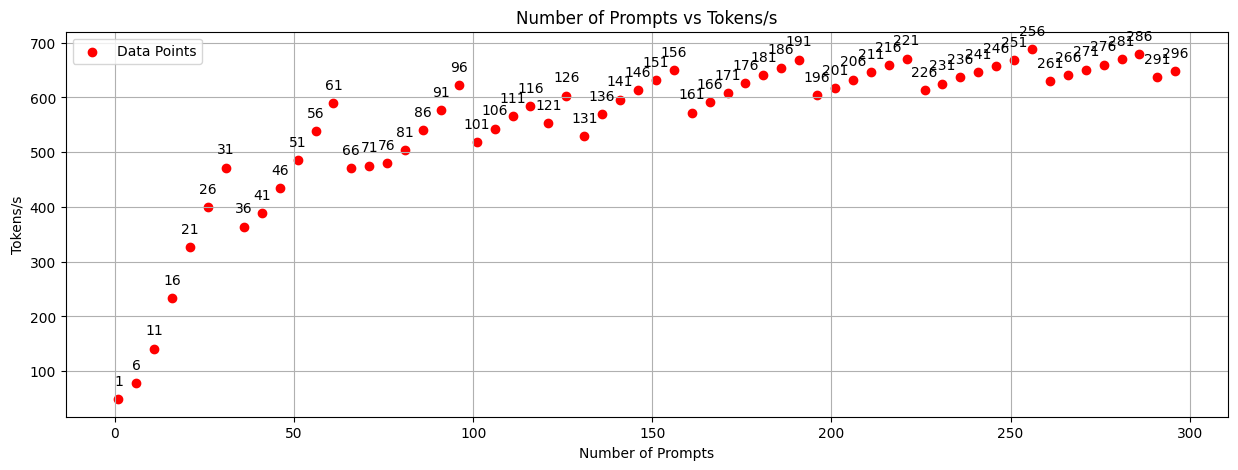

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is a DataFrame that contains 'num_prompts' and 'tokens_per_sec' columns

# Set the width and height of the plot
plt.figure(figsize=(15, 5))  # width = 15 inches, height = 5 inches

# Plotting the data points
plt.scatter(df['num_prompts'], df['tokens_per_sec'], color='red', label='Data Points')

# Adding labels and title
plt.xlabel('Number of Prompts')
plt.ylabel('Tokens/s')
plt.title('Number of Prompts vs Tokens/s')
plt.legend()
plt.grid(True)

# Adding labels to each data point
for i, txt in enumerate(df['num_prompts']):
    plt.annotate(txt, (df['num_prompts'][i], df['tokens_per_sec'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Display the plot
plt.show()


## Observations

- up to 31 prompts the speed (tokens/s) second **increases** drastically, i.e. better performance! 
- then there is a drop for 36 but increasing again 
- there are "clusters" consisting of 6-7 data points or 25-30 prompts difference

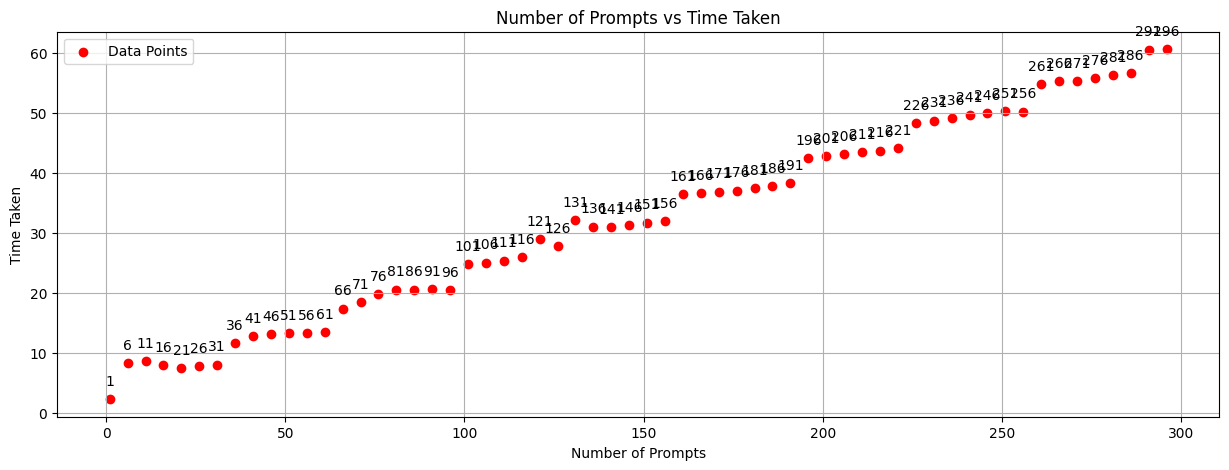

In [17]:

# Set the width and height of the plot
plt.figure(figsize=(15, 5))  # width = 15 inches, height = 5 inches

# Plotting the data points
plt.scatter(df['num_prompts'], df['time_taken'], color='red', label='Data Points')

# Adding labels and title
plt.xlabel('Number of Prompts')
plt.ylabel('Time Taken')
plt.title('Number of Prompts vs Time Taken')
plt.legend()
plt.grid(True)

# Adding labels to each data point
for i, txt in enumerate(df['num_prompts']):
    plt.annotate(txt, (df['num_prompts'][i], df['time_taken'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Display the plot
plt.show()


## Observations

- Time increases in "jumps" between clusters 
- Within the cluster it doesn't make a big difference (few secs only) how many prompts there are 

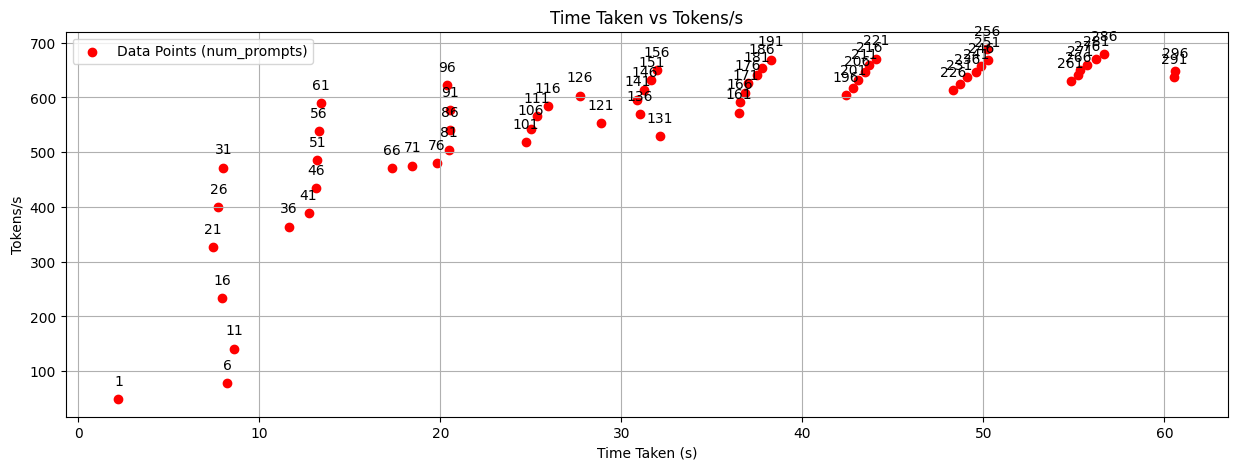

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is a DataFrame that contains 'time_taken', 'tokens_per_sec', and 'num_prompts' columns

# Set the width and height of the plot
plt.figure(figsize=(15, 5))  # width = 15 inches, height = 5 inches

# Plotting the data points
plt.scatter(df['time_taken'], df['tokens_per_sec'], color='red', label='Data Points (num_prompts)')

# Adding labels and title
plt.xlabel('Time Taken (s)')
plt.ylabel('Tokens/s')
plt.title('Time Taken vs Tokens/s')
plt.legend()
plt.grid(True)

# Adding labels to each data point
for i, txt in enumerate(df['num_prompts']):
    plt.annotate(txt, (df['time_taken'][i], df['tokens_per_sec'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Display the plot
plt.show()


## Observations
- Clusters become really evident 
- Impressive difference that 6 & 31 prompts take the same time to complete!

## To Do 

- test other models 
- test larger prompts 
- test even more prompts (1000 - 10000)

## Hypothesis 

- is max tokens/s plateauing at around 700 tokens/s? 
